# Teste do uso do método sem a normalização

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
df = pd.read_csv('../../data/rafaelDB.csv')

##### Plot dos dados

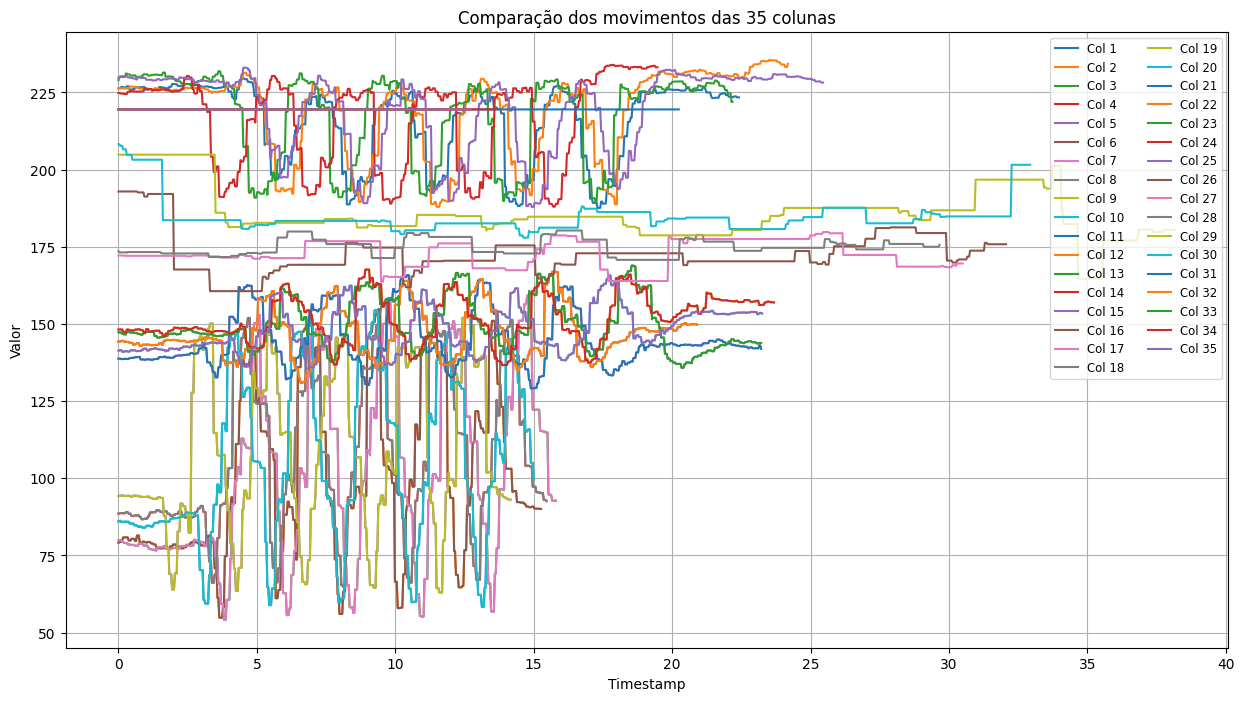

In [3]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

#### Normalização dos dados 

In [4]:
# Separa timestamp e sensores
timestamp = df.iloc[:, 0]
dados = df.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())


Menor tamanho válido: 344
(344, 36)
   timestamp   Vol1Ex1   Vol1Ex2   Vol1Ex3   Vol1Ex4   Vol1Ex5   Vol2Ex1  \
0     0.0000  86.05160  79.04637  79.92158  88.55168  94.18597  144.2986   
1     0.0334  86.05160  79.42403  79.92158  88.55168  94.36861  144.2986   
2     0.0668  86.24536  79.42403  79.92158  88.72372  94.36861  144.2986   
3     0.1002  85.88944  79.42403  79.92158  88.72372  94.36861  144.4738   
4     0.1336  85.88944  79.89925  79.41667  88.72372  94.40106  144.5396   

    Vol2Ex2   Vol2Ex3   Vol2Ex4  ...   Vol6Ex1   Vol6Ex2   Vol6Ex3   Vol6Ex4  \
0  138.7671  147.3392  148.2097  ...  192.9248  172.1902  173.6004  204.8451   
1  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
2  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
3  138.6201  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
4  138.6201  146.8200  148.2097  ...  192.9248  172.1767  173.1956  204.8451   

    Vol6Ex5   Vol7Ex1   Vo

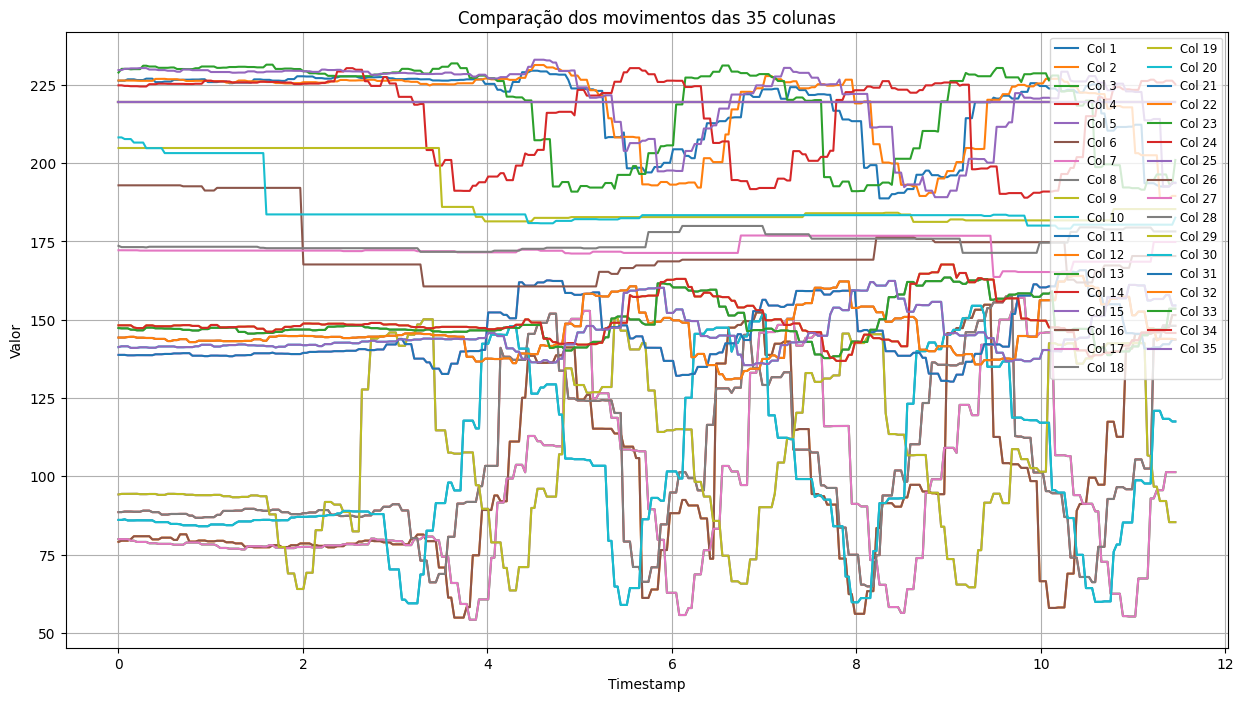

In [5]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df_final.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df_final.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

In [6]:
#transpondo a matriz 
df = df_final.T
df

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
timestamp,0.00000,0.03340,0.06680,0.10020,0.13360,0.16700,0.20040,0.23380,0.26720,0.30060,...,11.15560,11.18900,11.22240,11.25580,11.28920,11.32260,11.35600,11.38940,11.42280,11.45620
Vol1Ex1,86.05160,86.05160,86.24536,85.88944,85.88944,85.88944,85.92782,85.92782,85.92782,85.91203,...,97.68756,97.68756,120.90460,120.90460,120.90460,118.33170,118.33170,118.33170,117.49330,117.49330
Vol1Ex2,79.04637,79.42403,79.42403,79.42403,79.89925,80.83653,80.83653,80.83653,80.84084,80.84084,...,145.50160,145.50160,145.96920,145.96920,145.96920,147.59070,147.59070,147.59070,151.48710,151.48710
Vol1Ex3,79.92158,79.92158,79.92158,79.92158,79.41667,79.41667,79.02091,79.02091,79.02091,79.02091,...,67.34228,92.91782,92.91782,95.54456,95.54456,95.54456,101.32170,101.32170,101.32170,101.32170
Vol1Ex4,88.55168,88.55168,88.72372,88.72372,88.72372,88.67191,88.67191,88.67191,89.01524,89.01524,...,102.45950,102.45950,143.90810,143.90810,143.90810,148.16040,148.16040,148.04590,148.04590,148.04590
Vol1Ex5,94.18597,94.36861,94.36861,94.36861,94.40106,94.40106,94.40106,94.27642,94.27642,94.27642,...,106.65020,106.43960,96.67354,96.67354,92.09328,92.09328,92.09328,85.34341,85.34341,85.34341
Vol2Ex1,144.29860,144.29860,144.29860,144.47380,144.53960,144.53960,144.25480,144.25480,144.25480,144.16310,...,147.24300,147.24300,147.24300,143.39720,143.87740,143.87740,143.87740,143.87740,143.87740,143.67800
Vol2Ex2,138.76710,138.76710,138.76710,138.62010,138.62010,138.62010,138.68090,138.68090,138.68090,138.66650,...,140.78490,140.78490,141.18620,141.18620,141.18620,142.17100,142.17100,142.17100,143.61320,143.61320
Vol2Ex3,147.33920,147.23790,147.23790,147.23790,146.82000,146.82000,146.61340,146.61340,146.61340,147.48220,...,145.04020,147.01930,147.01930,147.01930,146.99450,146.99450,146.99450,153.51360,153.51360,153.51360
Vol2Ex4,148.20970,148.20970,148.20970,148.20970,148.20970,147.52790,147.31900,147.31900,147.31900,148.18790,...,145.90460,145.98290,145.98290,146.30200,146.30200,146.30200,145.76400,145.76400,145.76400,145.76400


##### Modelo 

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Considerando que df_coluna é o DataFrame onde:
# - A primeira coluna é o timestamp
# - As colunas seguintes são séries temporais (cada uma representa um exercício)

# 1. Separar os dados (excluindo a linha do timestamp)
X = df.iloc[1:].values 
# 2. Definir número de clusters
k = 4

# 3. Aplicar K-means diretamente nos dados brutos
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)


C:\Users\Yama\AppData\Local\Temp\ipykernel_5200\469713000.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', k)  # k = número de clusters


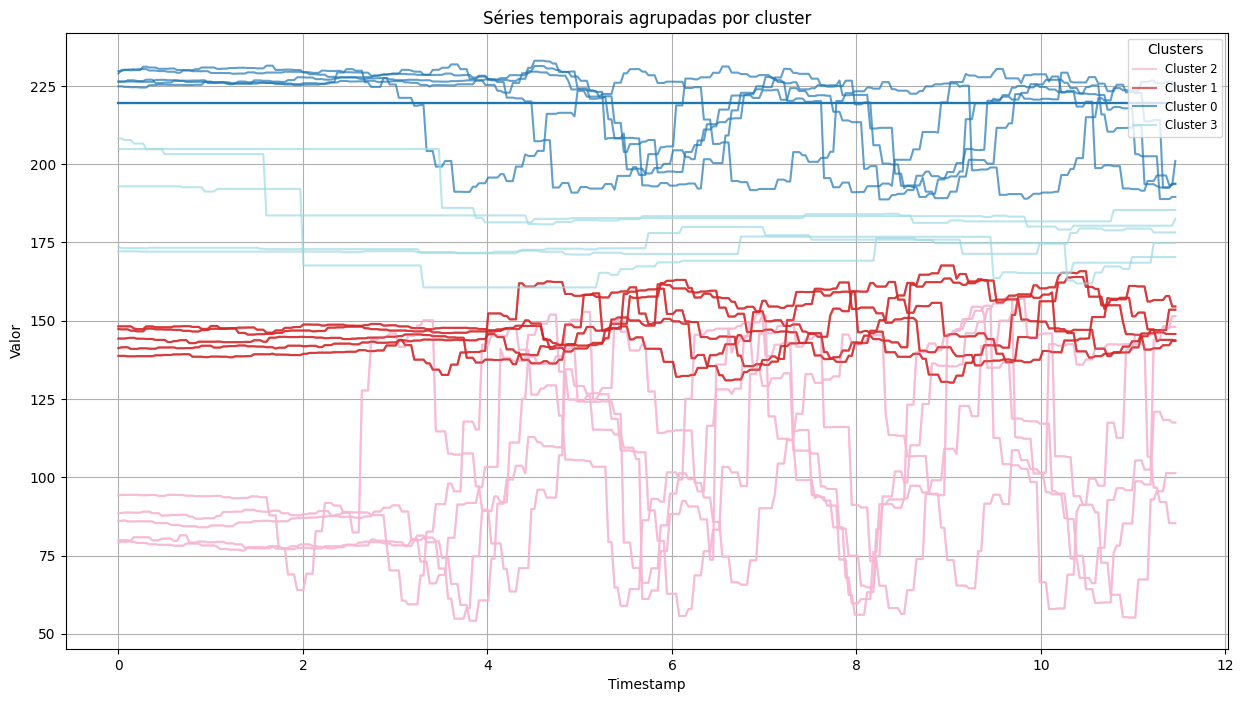

In [8]:
# timestamp (eixo X)
timestamp = df.iloc[0].values

# séries temporais (linhas 1 a n)
series = df.iloc[1:].values

# clusterização (já feita)
# clusters = resultado do KMeans -> array com shape (n_exercicios,)

# mapa de cores com até 20 clusters distintos
cmap = cm.get_cmap('tab20', k)  # k = número de clusters

plt.figure(figsize=(15, 8))
for i, serie in enumerate(series):
    cluster_id = clusters[i]
    plt.plot(timestamp, serie, color=cmap(cluster_id), alpha=0.7, label=f'Cluster {cluster_id}' if i == list(clusters).index(cluster_id) else "")

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Séries temporais agrupadas por cluster')
plt.grid(True)
plt.legend(title='Clusters', fontsize='small', loc='upper right')
plt.show()


C:\Users\Yama\AppData\Local\Temp\ipykernel_5200\1462329659.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', k)  # até 10 clusters distintos


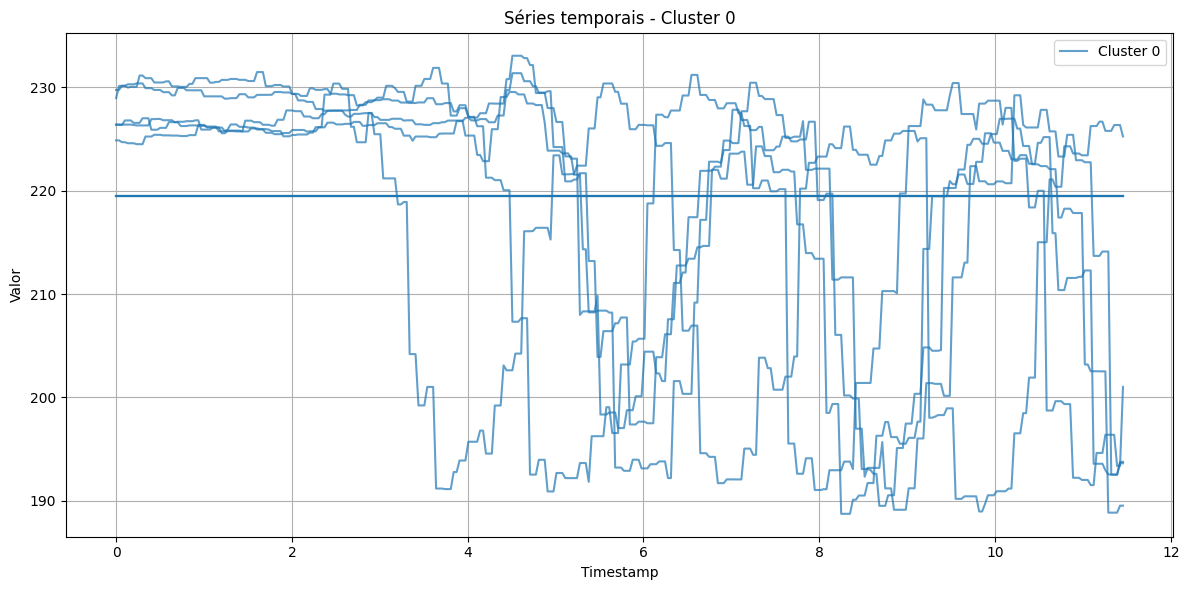

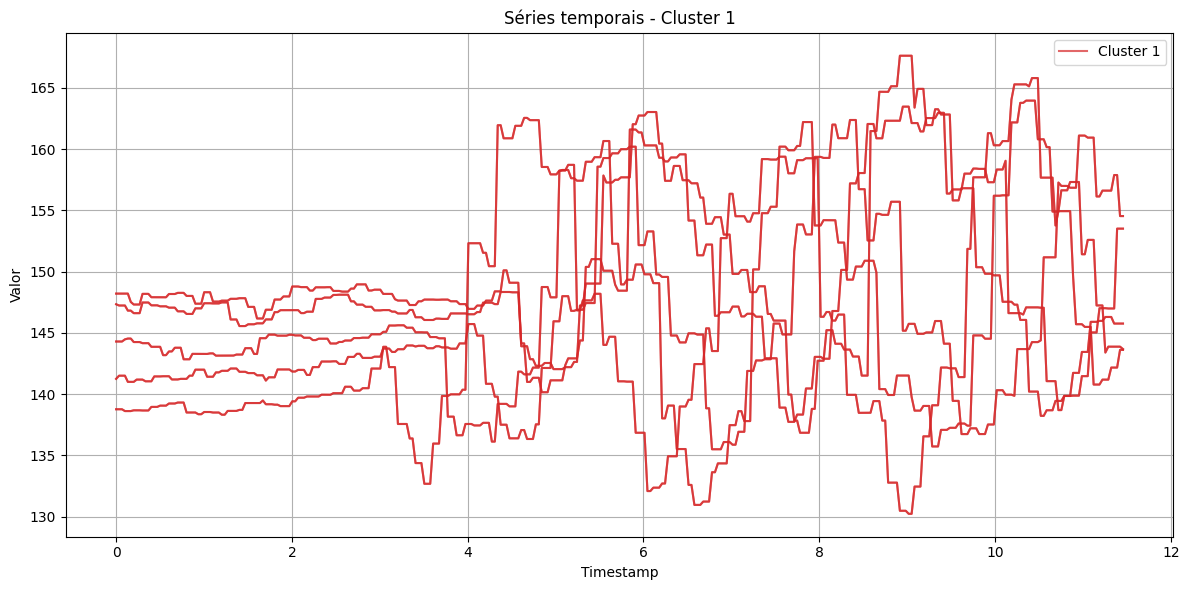

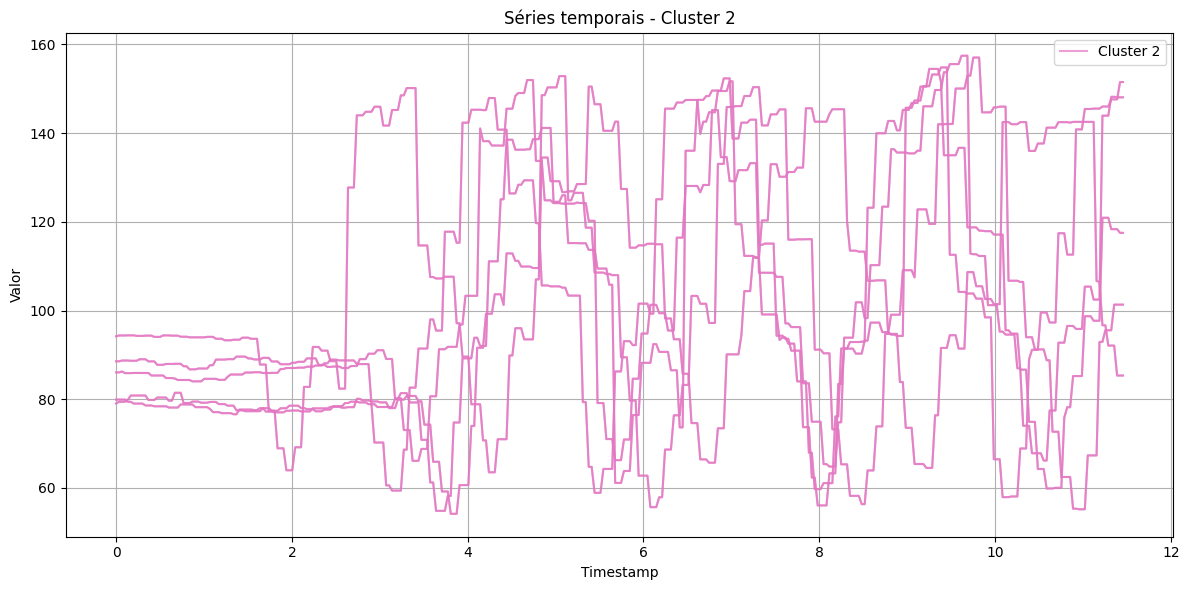

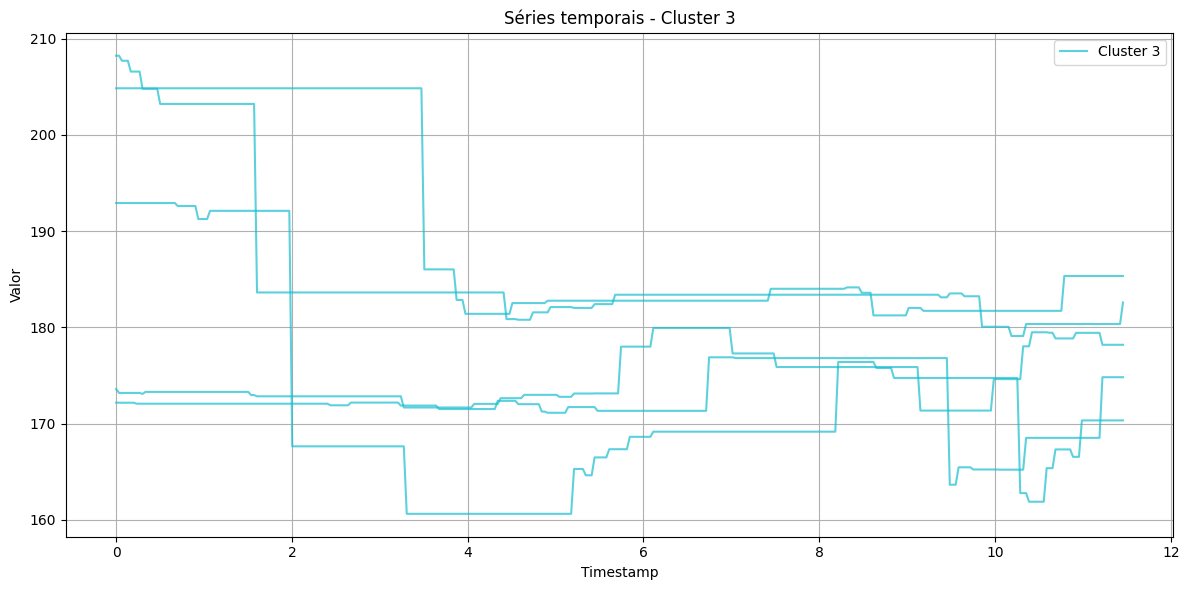

In [9]:
# timestamp (eixo X)
timestamp = df.iloc[0].values

# séries temporais (linhas 1 em diante)
series = df.iloc[1:].values

# Defina seu colormap
cmap = cm.get_cmap('tab10', k)  # até 10 clusters distintos

# Para cada cluster, plotar um gráfico separado
for cluster_id in range(k):
    # Pega os índices das séries pertencentes ao cluster atual
    indices = np.where(clusters == cluster_id)[0]

    # Cor única para este cluster
    color = cmap(cluster_id)

    # Criar gráfico para o cluster atual
    plt.figure(figsize=(12, 6))
    for i in indices:
        plt.plot(timestamp, series[i], color=color, alpha=0.7)

    plt.title(f'Séries temporais - Cluster {cluster_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend([f'Cluster {cluster_id}'], loc='upper right')
    plt.tight_layout()
    plt.show()
